1) Escolha uma base de dados de classificação (ex.: wine, breast cancer, iris). O
Scikit-learn e o UCI Repository possuem algumas bases. Caso algum dado seja
categórico, transforme para númerico.
2) Divida os dados em treino/teste utilizando a técnica hold-out. Escolha uma
porcentagem para treino/teste (mais utilizadas: 90/10, 80/20, 75/25, 70/30, 50/50).
3) Realize a classificação utilizando o KNN, utilizando a biblioteca Scikit-Learn.
4) Calcule algumas métricas. Obrigatório: acurácia. Exemplo de outras métricas: recall,
precision, F1-Score. Utilize o Scikit-Learn (classification_report, accuracy_score,
f1_score, etc)
5) Plot a matriz de confusão.
6) Realize vários experimentos, modificando a quantidade de vizinhos (parametro
n_neighbors), e crie um plot (k vs acurácia).
7) Discuta os resultados encontrados.
8) Utilize a técnica k-fold e discuta os resultados, comparando com a técnica hold-out.

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split


In [21]:
cols = ['sepal_length','sepal_width','petal_length','petal_width','class']
df = pd.read_csv("Dataset\iris (1).data", header=None, names=cols)

In [22]:
df

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [23]:
X = df.iloc[:,0:4]
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [24]:
Y = df.iloc[:,4]
Y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: class, Length: 150, dtype: object

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25)

In [26]:
X_train

,sepal_length,sepal_width,petal_length,petal_width
26,5.0,3.4,1.6,0.4
97,6.2,2.9,4.3,1.3
139,6.9,3.1,5.4,2.1
121,5.6,2.8,4.9,2.0
65,6.7,3.1,4.4,1.4
...,...,...,...,...
66,5.6,3.0,4.5,1.5
51,6.4,3.2,4.5,1.5
138,6.0,3.0,4.8,1.8
128,6.4,2.8,5.6,2.1


In [27]:
X_test

,sepal_length,sepal_width,petal_length,petal_width
55,5.7,2.8,4.5,1.3
67,5.8,2.7,4.1,1.0
56,6.3,3.3,4.7,1.6
108,6.7,2.5,5.8,1.8
81,5.5,2.4,3.7,1.0
2,4.7,3.2,1.3,0.2
35,5.0,3.2,1.2,0.2
143,6.8,3.2,5.9,2.3
31,5.4,3.4,1.5,0.4
71,6.1,2.8,4.0,1.3


In [28]:
Y_train

26         Iris-setosa
97     Iris-versicolor
139     Iris-virginica
121     Iris-virginica
65     Iris-versicolor
            ...       
66     Iris-versicolor
51     Iris-versicolor
138     Iris-virginica
128     Iris-virginica
95     Iris-versicolor
Name: class, Length: 112, dtype: object

In [29]:
Y_test

55     Iris-versicolor
67     Iris-versicolor
56     Iris-versicolor
108     Iris-virginica
81     Iris-versicolor
2          Iris-setosa
35         Iris-setosa
143     Iris-virginica
31         Iris-setosa
71     Iris-versicolor
115     Iris-virginica
141     Iris-virginica
41         Iris-setosa
125     Iris-virginica
64     Iris-versicolor
39         Iris-setosa
16         Iris-setosa
5          Iris-setosa
114     Iris-virginica
32         Iris-setosa
47         Iris-setosa
135     Iris-virginica
37         Iris-setosa
113     Iris-virginica
7          Iris-setosa
50     Iris-versicolor
86     Iris-versicolor
63     Iris-versicolor
29         Iris-setosa
84     Iris-versicolor
148     Iris-virginica
91     Iris-versicolor
72     Iris-versicolor
100     Iris-virginica
123     Iris-virginica
58     Iris-versicolor
132     Iris-virginica
12         Iris-setosa
Name: class, dtype: object

In [30]:
neigh = KNeighborsClassifier(n_neighbors=3)

Sempre transformar entradas categoricas em numericas

In [31]:
labelencoder = LabelEncoder()

Y_train = labelencoder.fit_transform(Y_train)


In [32]:
neigh.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [33]:
Y_test = labelencoder.fit_transform(Y_test)
Y_test

array([1, 1, 1, 2, 1, 0, 0, 2, 0, 1, 2, 2, 0, 2, 1, 0, 0, 0, 2, 0, 0, 2,
       0, 2, 0, 1, 1, 1, 0, 1, 2, 1, 1, 2, 2, 1, 2, 0])

In [34]:
Y_predict = neigh.predict(X_test)
Y_predict

C:\Users\francisco.neto\.conda\envs\ai\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1, 1, 1, 2, 1, 0, 0, 2, 0, 1, 2, 2, 0, 2, 1, 0, 0, 0, 2, 0, 0, 2,
       0, 2, 0, 1, 1, 1, 0, 1, 2, 1, 2, 2, 2, 1, 2, 0])

In [35]:
Y_test

array([1, 1, 1, 2, 1, 0, 0, 2, 0, 1, 2, 2, 0, 2, 1, 0, 0, 0, 2, 0, 0, 2,
       0, 2, 0, 1, 1, 1, 0, 1, 2, 1, 1, 2, 2, 1, 2, 0])

In [36]:
print(classification_report(Y_test,Y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.92      0.96        13
           2       0.92      1.00      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



In [37]:
cm = confusion_matrix(Y_test,Y_predict)

In [38]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

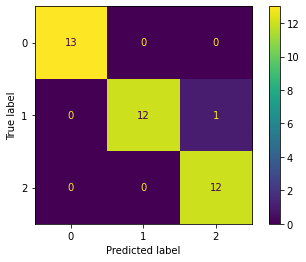

In [39]:
disp.plot()